In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import time

Parameters

In [40]:
rock_percentage = 0.5
n_iterations = 4
n_neighborhood = 2
room_size = 50
neighborhood_threshold = 13
neighborhood_threshold


13

Count Neighbors Function

In [41]:
# convolve function
def count_neighbors_convolve2d(array, n_neighborhood=1):
    kernel = np.ones((2*n_neighborhood + 1, 2*n_neighborhood + 1))
    kernel[n_neighborhood, n_neighborhood] = 0
    neighbor_count = convolve2d(array, kernel, mode='same', boundary='fill', fillvalue=0)
    return neighbor_count

# for loop function
def count_neighbors(binary_array):
    # Create a padding array with zeros
    padded_array = np.pad(binary_array, 1, mode='constant', constant_values=0)
    
    # Initialize the output array
    neighbor_count = np.zeros_like(binary_array)
    
    # Iterate over the original array
    for i in range(binary_array.shape[0]):
        for j in range(binary_array.shape[1]):
            # Extract the 3x3 neighborhood around the current cell
            neighborhood = padded_array[i:i+3, j:j+3]
            
            # Count the number of ones in the neighborhood (excluding the center cell)
            neighbor_count[i, j] = np.sum(neighborhood) - padded_array[i+1, j+1]
    
    return neighbor_count

# Create a 50x50 array of zeros and ones
array = np.random.choice([0, 1], size=(50, 50))

# Measure the time for the first function
start_time = time.time()
result1 = count_neighbors_convolve2d(array)
end_time = time.time()
print(f"Time for the first function: {end_time - start_time} seconds")

# Measure the time for your function
start_time = time.time()
result2 = count_neighbors(array)
end_time = time.time()
print(f"Time for your function: {end_time - start_time} seconds")

# Check if the results are the same
print(f"Are the results the same? {np.array_equal(result1, result2)}")


Time for the first function: 0.00020599365234375 seconds
Time for your function: 0.010877132415771484 seconds
Are the results the same? True


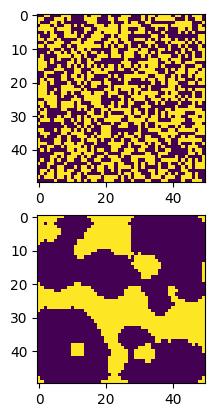

In [53]:
rooms = []
rooms.append(np.random.choice([0, 1], (room_size, room_size) ,p=[1-rock_percentage, rock_percentage]))

fig, axes = plt.subplots(1+1)
axes[0].imshow(rooms[0])
for i in range(n_iterations):
    neighbor_count = count_neighbors_convolve2d(rooms[i], n_neighborhood)
    rooms.append((neighbor_count < neighborhood_threshold).astype(int))
axes[-1].imshow(rooms[i+1])

    

In [117]:
neighborhood_threshold

12